Initialisation

In [4]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import time

N = 10 #Number of points

Dataset generation

In [5]:
def generateB(n):
    """
    Return list of n list of 2 elements
    """
    return rd.uniform(size=(n, 2))
    

In [6]:
def generateA(n):

    A=generateB(n-4)

    #adding the corner
    A= np.append(A,[[0,0]],axis=0)
    A= np.append(A,[[0,1]],axis=0)
    A= np.append(A,[[1,0]],axis=0)
    A= np.append(A,[[1,1]],axis=0)

    #rotating the set
    angle = rd.uniform() * 2 * np.pi
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    A = A @ rotation_matrix

    # Shuffle the points
    np.random.shuffle(A)
    return A


In [7]:
def generateC(n,r):
    C=[]
    while np.size(C,0)<n:
        x,y=rd.uniform(0,r),rd.uniform(0,r)
        if x**2+y**2<=r**2:
            C.append([x,y])
    return np.array(C)

In [8]:
def generateD(n,r):
    D=[]
    for i in range(n):
        angle = rd.uniform()*2*np.pi
        D.append([r*np.cos(angle),r*np.sin(angle)])
    return np.array(D)


Sweeping

In [9]:
def sort(L):
    return L[L[:,0].argsort()]

In [10]:
def orientiation_triangle(A,B,C):
    determinent = (B[1] - A[1]) * (C[0] - B[0]) - (B[0] - A[0]) * (C[1] - B[1])
    if determinent >= 0:
      return "clockwise"
    else:
        return "counter-clockwise"

In [11]:
def view_triangle():
    A = [1,0]
    B = [0,1]
    C = [1,1]
    plt.plot(A[0], A[1], marker=".")
    plt.text(A[0], A[1],'A',horizontalalignment='right')
    plt.plot(B[0], B[1], marker="X", markersize=10)
    plt.text(B[0], B[1],'B',horizontalalignment='right')
    plt.plot(C[0], C[1], marker="X", markersize=10)
    plt.text(C[0], C[1],'C',horizontalalignment='right')

    print(orientiation_triangle(A,B,C))
    plt.show()

In [12]:
def sweeping_algorithm_upper(Dataset):
    chain=[]

    #The first point is a fake one so we ensure that we always have a convex shape
    chain.append([Dataset[0][0], Dataset[0][1]-1])

    chain.append(Dataset[0])
    for i in range(1,np.size(Dataset, axis=0)):
        q = chain[-1]
        p = chain[-2]
        cursor = Dataset[i]
    
        # Comparision of the sens of the angle
        while orientiation_triangle(p,q,cursor) != "clockwise" and len(chain) > 2:
            chain.pop()
            q = chain[-1]
            p = chain[-2]

        # Adding the cursor point in the chain
        chain.append(cursor)
    
    del chain[0]
    return chain

    
def sweeping_algorithm_lower(Dataset):
    chain=[]

    #The first point is a fake one so we ensure that we always have a convex shape
    chain.append([Dataset[0][0], Dataset[0][1]-1])

    chain.append(Dataset[0])
    for i in range(1,np.size(Dataset, axis=0)):
        q = chain[-1]
        p = chain[-2]
        cursor = Dataset[i]
    
        # Comparision of the sens of the angle
        while orientiation_triangle(p,q,cursor) == "clockwise" and len(chain) > 2:
            chain.pop()
            q = chain[-1]
            p = chain[-2]

        # Adding the cursor point in the chain
        chain.append(cursor)
    
    del chain[0]
    return chain

In [13]:
def affichage_chaine(Dataset):
    Dataset = sort(Dataset)
    chain_lower = sweeping_algorithm_lower(Dataset)
    chain_upper = sweeping_algorithm_upper(Dataset)

    #Plot des points
    for i in range(np.size(Dataset, axis=0)):
        plt.plot(Dataset[i][0], Dataset[i][1], marker=".")
    
    #Plot of seigment
    for i in range(len(chain_lower)-1):
        plt.plot([chain_lower[i][0],chain_lower[i+1][0]], [chain_lower[i][1],chain_lower[i+1][1]], 'k-')
    for i in range(len(chain_upper)-1):
        plt.plot([chain_upper[i][0],chain_upper[i+1][0]], [chain_upper[i][1],chain_upper[i+1][1]], 'k-')
    
    plt.grid()
    plt.show()


Complexity

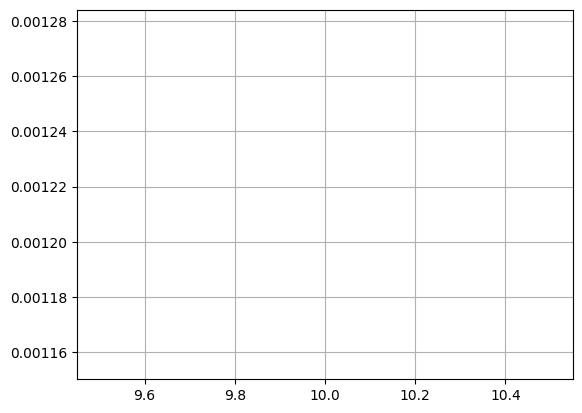

In [14]:
def print_complexity(upper_limite):
    n = []
    time_table = []
    for i in range(10, upper_limite,100000):
        t_init = time.time()
        A = generateA(i)
        A = sort(A)
        chain_lower = sweeping_algorithm_lower(A)
        chain_upper = sweeping_algorithm_upper(A)
        t_final = time.time()
        n.append(i)
        time_table.append(t_final-t_init)
        
        plt.plot(n, time_table)
    plt.grid()
    plt.show()

print_complexity(1000)

Output sensitive algorithm

In [30]:
def median(L):
    if len(L)<=5:
        return median_sous_liste(L)
    else:
        return selection(L, len(L)//2)

def selection(L,k):
    if len(L)<=5:
        return median_sous_liste(L)
    else:
        liste_of_mediane=[median_sous_liste(L[i:i+5]) for i in range(0, len(L), 5)]
        mediane_of_mediane = selection(liste_of_mediane, len(liste_of_mediane)//2)
        
        under = [x for x in L if x<mediane_of_mediane]
        over = [x for x in L if x>= mediane_of_mediane]
        
        if k < len(under):
            return selection(under, k)
        elif k == len(under):
            return mediane_of_mediane
        else:
            return selection(over, k - len(under) - 1)


def median_sous_liste(L):
    L = np.sort(L)
    if len(L)==5 :
        return L[2]
    elif len(L) == 4 :
        return (L[1]+L[2])/2
    elif len(L)== 3 :
        return L[1]
    elif len(L) == 2 : 
        return (L[0]+L[1])/2
    else :
        return L[0]

In [ ]:
def above(p1,p2,p3):
    """
    Tells if p1 is above the line defined by p2 and p3
    """
    def function(x):
        return ((p3[1]-p2[1])/(p3[0]-p2[0])*(x-p3[0])+p3[1])
    if p1[1]> function(p1[0]):
        return True
    else:
        return False

In [ ]:
def find_basis(dataset):
    median = median(dataset[:,0])
    points_copy = np.copy(dataset)
    
    #initialization of p1 and p2
    p1=dataset[0]
    i=0
    while p1[0]>=median:
        i=i+1
        p1=dataset[i]
    points_copy.pop(i)
    
    i=0
    p2=dataset[0]
    while p2<median:
        i=i+1
        p2=dataset[i]
    points_copy.pop(i)

    #Shuffling so we pick up a random point
    points_copy=rd.shuffle(points_copy)

    #Applying th algorithm
    left=[p1]
    right=[p2]

    while np.size(points_copy, axis=0)>0:
        p3=points_copy.pop(0)
        if p3>=median:
            right.append(p3)
            if above(p3,p1,p2):
                min_pente= - np.inf()
                indice_min_pente = -1
                for i in range(len(left)):
                    pente = (p3[1]-left[i][1])/(p3[0]-left[i][0])
                    if pente>min_pente:
                        min_pente=pente
                        indice_min_pente=i
                    p1=left[i]
                    p2=p3
        else:
            left.append(p3)
            if above(p3,p1,p2):
                min_pente= -np.inf()
                indice_min_pente = -1
                for i in range(len(right)):
                    pente = (right[i][1]-p3[1])/(right[i][0]-p3[0])
                    if pente>min_pente:
                        min_pente=pente
                        indice_min_pente=i
                    p1=p3
                    p2=right[i]
    return p1,p2
